# Customer Personality Analysis

Customer Personality Analysis presents a strategic advantage for businesses seeking a deeper understanding of their clients. Customer analysis proves indispensable for businesses aiming to optimize resource allocation. Instead of adopting a similar marketing strategy for all, companies can leverage customer personality insights to identify the most receptive segments for specific products or promotions.

This dataset contains information of the customer of a grocery store. It delves into attributes such as birth year, education, marital status, and household income. This dataset's richness extends to product-related information, including expenditures on wine, fruits, meat, fish, sweets, and gold over the past two years. Additionally, it provides insights into customer responses to various promotions, online and offline purchasing behaviors, and responses to different marketing campaigns. Businesses can tailor their products and services to meet the specific needs, behaviors, and concerns of diverse customer segments.

<p align="center">
  <img src="analysis.png" alt="image" width="600" height="300"/>
</p>



In [56]:
# Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

In [57]:
# Loading the dataset into a Pandas DataFrame

customer_data = pd.read_csv("customer_data.csv", sep="\t")
print("Number of datapoints:", len(customer_data))
customer_data

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### Data Cleaning

###### As the above data set is unorganized and contains a lot of irrelevant information, next I will clean it. Starting by taking a look at the info that is required to be cleaned.

In [58]:
# Print all the columns of the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### From the above output, we can conclude that: 
- There are missing values in income.
- We can combine some columns into 1 and then anlyze it.
- There are some categorical values in our data frame; as there are some columns in object dtype. So we will need to encode them into numeric forms later.

###### First of all, for the missing values, I am simply going to drop the rows that have missing values.

In [59]:
#To remove the NA values
customer_data = customer_data.dropna()

print("Total number of rows after dropping the rows with null values is: ", len(customer_data))

Total number of rows after dropping the rows with null values is:  2216


###### Now, to make the data more uniform, I will change the different categories of Education and Marital status into more generalised one.

In [60]:
print("Total categories in the Marital_Status:\n", customer_data["Marital_Status"].value_counts(), "\n")
print("Total categories in the Education:\n", customer_data["Education"].value_counts())

Total categories in the Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


### Feature engineering 
###### Feature engineering involves creating new features or transforming existing ones to enhance the performance of a machine learning model or to gain better insights from the data.

###### To make the dataset more clear, I am changing the patterns of some columns

In [61]:
customer_data_copy = customer_data.copy()
# Calculating age of customer from their year of birth
customer_data["Age"] = 2024 - customer_data["Year_Birth"]

# Calculating total spendings on various items
customer_data["Spent"] = customer_data["MntWines"] + customer_data["MntFruits"] + customer_data["MntMeatProducts"] + customer_data["MntFishProducts"] + customer_data["MntGoldProds"] + customer_data["MntSweetProducts"] 

# Feature indicating total children living in the household
customer_data["Children"] = customer_data["Kidhome"] + customer_data["Teenhome"]

# Segmenting the different education levels in three groups: Undergraduate, Graduate, and Postgraduate
customer_data["Education"] = customer_data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# Changing the different marital status to Married and Single
customer_data["Marital_Status"] = customer_data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

# Column for total members in the householde
customer_data["Family_Size"] = customer_data["Marital_Status"].replace({"Partner":2, "Alone": 1})+ customer_data["Children"]

# New column for total promotions accepted
customer_data["Total_Promos"] = customer_data["AcceptedCmp1"] + customer_data["AcceptedCmp2"] + customer_data["AcceptedCmp3"] + customer_data["AcceptedCmp4"] + customer_data["AcceptedCmp5"]



C:\Users\mathu\AppData\Local\Temp\ipykernel_19676\1168797152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data["Age"] = 2024 - customer_data["Year_Birth"]
C:\Users\mathu\AppData\Local\Temp\ipykernel_19676\1168797152.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data["Spent"] = customer_data["MntWines"] + customer_data["MntFruits"] + customer_data["MntMeatProducts"] + customer_data["MntFishProducts"] + customer_data["MntGoldProds"] + customer_data["MntSweetProducts"]
C:\Users\m

In [62]:
# Dropping the columns that are not required
to_drop = ["ID", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntGoldProds", "MntSweetProducts", "Kidhome", "Teenhome", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Complain", "Response", "Recency"]
customer_data = customer_data.drop(to_drop, axis=1)
customer_data

,Education,Marital_Status,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Children,Family_Size,Total_Promos
0,Graduate,Alone,58138.0,3,8,10,4,7,67,1617,0,1,0
1,Graduate,Alone,46344.0,2,1,1,2,5,70,27,2,3,0
2,Graduate,Partner,71613.0,1,8,2,10,4,59,776,0,2,0
3,Graduate,Partner,26646.0,2,2,0,4,6,40,53,1,3,0
4,Postgraduate,Partner,58293.0,5,5,3,6,5,43,422,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Partner,61223.0,2,9,3,4,5,57,1341,1,3,0
2236,Postgraduate,Partner,64014.0,7,8,2,5,7,78,444,3,5,1
2237,Graduate,Alone,56981.0,1,2,3,13,6,43,1241,0,1,1
2238,Postgraduate,Partner,69245.0,2,6,5,10,3,68,843,1,3,0


##### The final dataset has the following attributes

- Age: Customer's age
- Children: Number of children in the family
- Family_size: Total number of people in the family (including adults and children)
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Spent: Total amount spent by customer in last 2 years.
- Total_Promos: Total number of promotions accepted
- NumDealsPurchases: Number of purchases made with a discount
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month 

In [63]:
customer_data.describe()

,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Children,Family_Size,Total_Promos
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,2.323556,4.085289,2.671029,5.800993,5.319043,55.179603,607.075361,0.947202,2.592509,0.298285
std,25173.076661,1.923716,2.740951,2.926734,3.250785,2.425359,11.985554,602.900476,0.749062,0.905722,0.679209
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,1.000000,2.000000,0.000000,3.000000,3.000000,47.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,2.000000,4.000000,2.000000,5.000000,6.000000,54.000000,396.500000,1.000000,3.000000,0.000000
75%,68522.000000,3.000000,6.000000,4.000000,8.000000,7.000000,65.000000,1048.000000,1.000000,3.000000,0.000000
max,666666.000000,15.000000,27.000000,28.000000,13.000000,20.000000,131.000000,2525.000000,3.000000,5.000000,4.000000


###### This is the stat of each column that I am going to analyze in deep

### Data Visualization

#### Demographic Analysis

###### This section will provide an overview of the age distribution, total family members, income distriburion and marital status.
###### First, outliers, if present, can significantly impact statistical measures and model performance. To know, the outliers in the age and income distribution, box plots help visualize the distribution of data, highlighting potential outliers. Outliers can distort visualizations, making it challenging to interpret and draw meaningful insights. Removing outliers can result in clearer and more accurate visualizations.


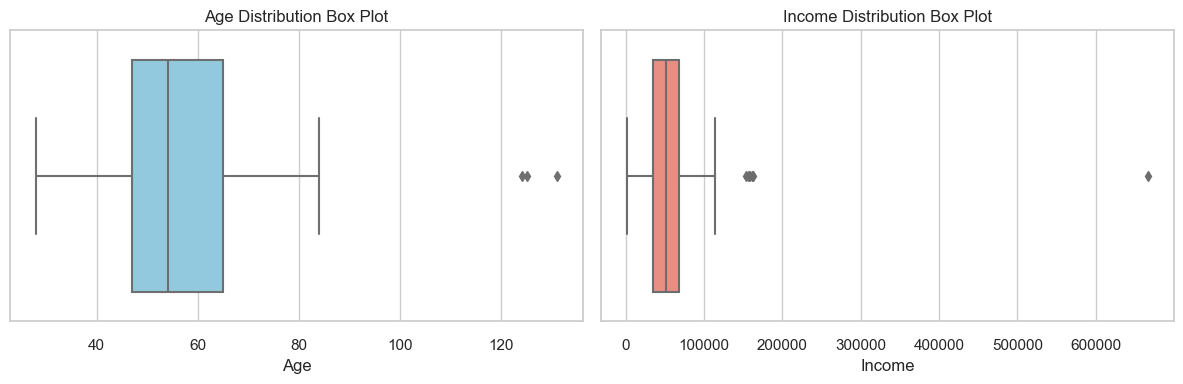

In [64]:
# Set up the plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))

# Box plot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=customer_data['Age'], color='skyblue')
plt.title('Age Distribution Box Plot')

# Box plot for Income
plt.subplot(1, 2, 2)
sns.boxplot(x=customer_data['Income'], color='salmon')
plt.title('Income Distribution Box Plot')

plt.tight_layout()

# Show the plots
plt.show()

###### Clearly, there are a few outliers in the Income and Age columns. I will be deleting the outliers in the data.

In [65]:
#Dropping the outliers by setting a cap on Age and income. 
customer_data = customer_data[(customer_data["Age"]<90)]
customer_data = customer_data[(customer_data["Income"]<200000)]
print("The total number of data-points after removing the outliers are:", len(customer_data))

The total number of data-points after removing the outliers are: 2212


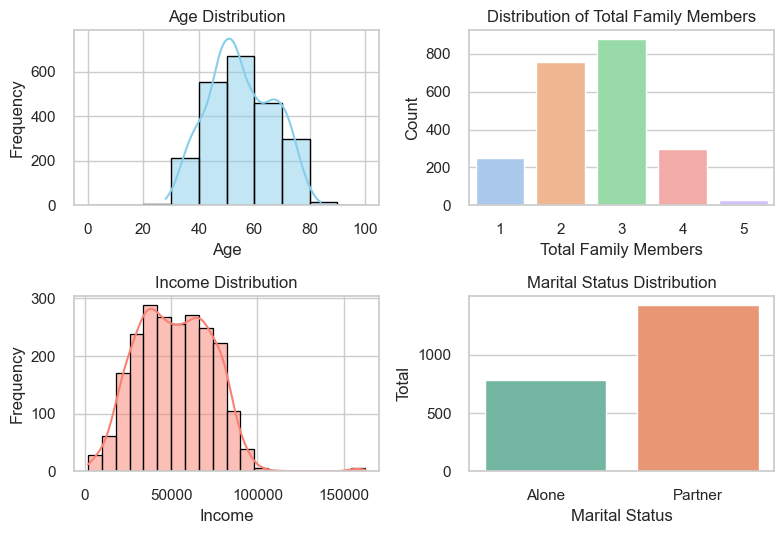

In [66]:
# Age Distribution
plt.subplot(2, 2, 1)
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
sns.histplot(customer_data['Age'], bins=age_bins, kde=True, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Family Size vs. Children
plt.subplot(2, 2, 2)
sns.countplot(x='Family_Size', data=customer_data, palette='pastel')
plt.title('Distribution of Total Family Members')
plt.xlabel('Total Family Members')
plt.ylabel('Count')

# Income Distribution
plt.subplot(2, 2, 3)
sns.histplot(customer_data['Income'], bins=20, kde=True, color='salmon', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Marital Status Distribution
plt.subplot(2, 2, 4)
sns.countplot(x='Marital_Status', data=customer_data, palette='Set2')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Total')

plt.tight_layout()
# Show the plots
plt.show()

**Age distribution**
- The age distribution plot shows that the majority of customers fall within a range of 40 to 70 years, indicating a concentration of customers in a specific demographic.

**Distribution of Total Family Members**
- The common family size in the dataset is 2 or 3 members

**Income Distribution**
- The distribution appears right-skewed, indicating that there might be more customers with incomes lower than 100,000, but there are also customers with higher incomes.

**Marital Status Distribution**
- More than 50% customers are married.

###### Next, let us look at the correlation amongst the columns (excluding the categorical attributes at this point).

C:\Users\mathu\AppData\Local\Temp\ipykernel_19676\195148741.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_rmat= customer_data.corr()


<AxesSubplot: >

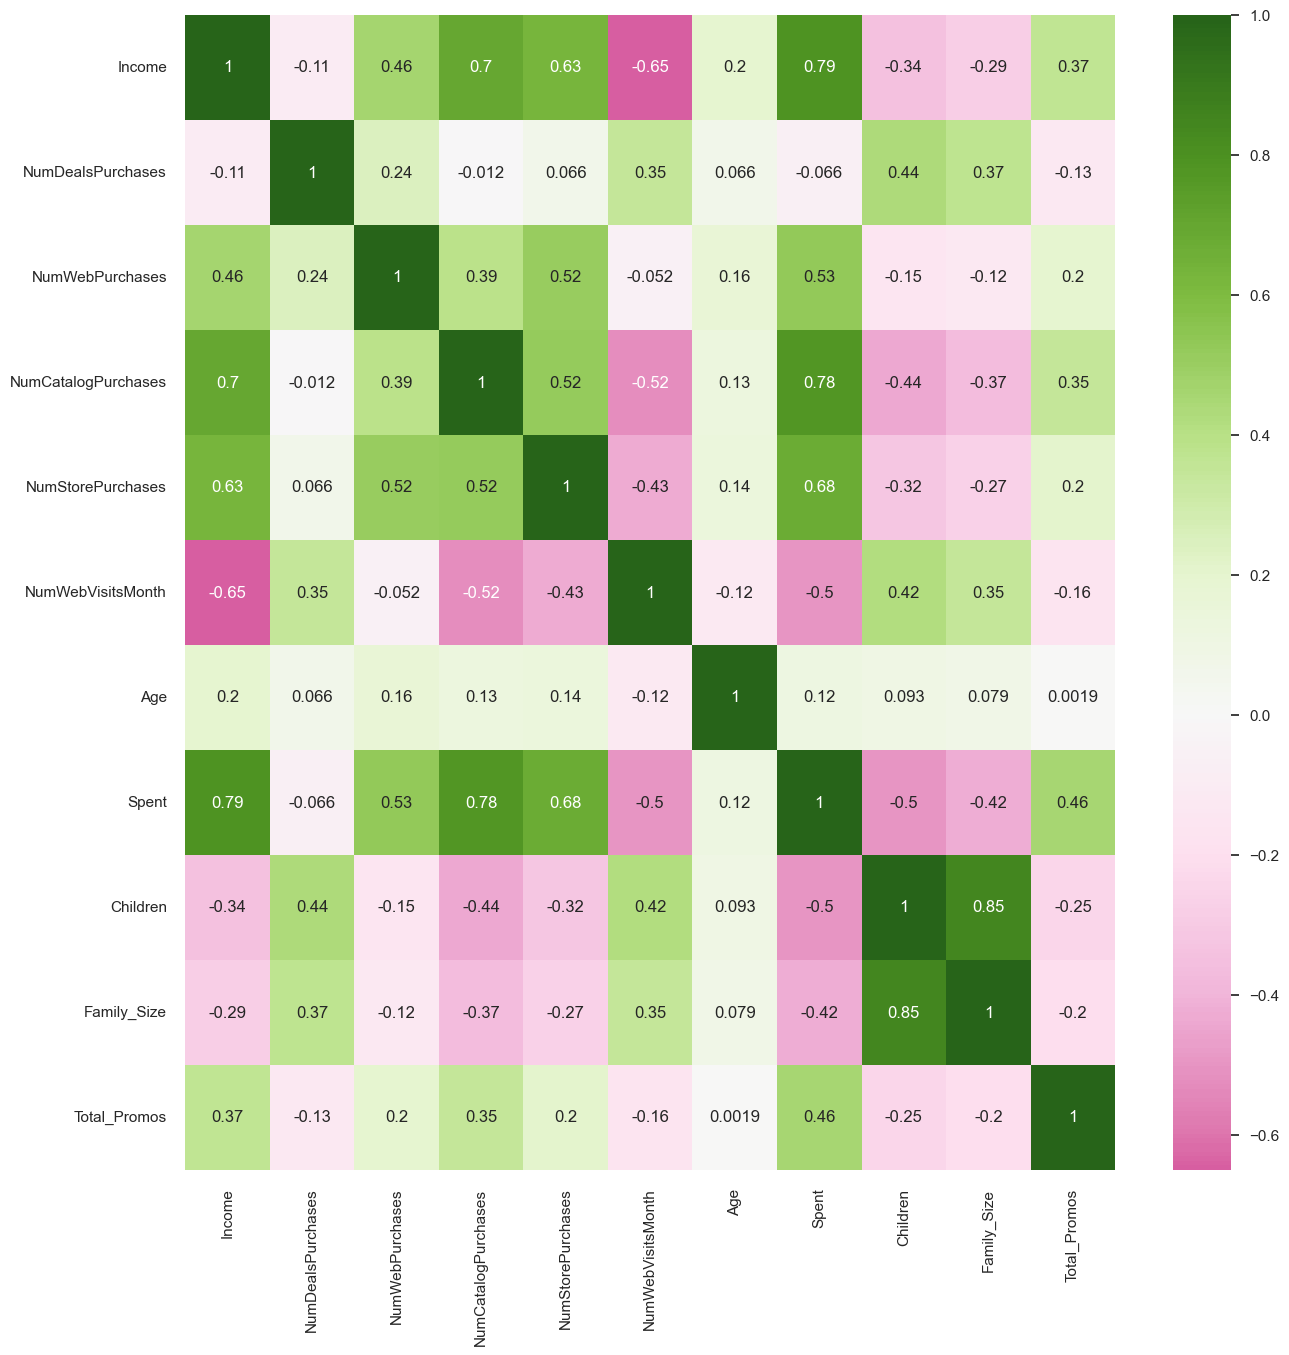

In [67]:
#correlation matrix
cor_rmat= customer_data.corr()
plt.figure(figsize=(15, 15))  
sns.heatmap(cor_rmat, annot=True, cmap="PiYG", center=0)

From the above correlation matrix, we can see the relation of one factor with another,
- A positive correlation value close to 1 indicates that as one variable increases, the other variable tends to increase.
- A negative correlation value close to -1 indicates that as one variable increases, the other variable tends to decrease.

Now, the next step is preprocessing the data.

### Data Preprocessing

###### In the data preprocessing phase, several essential steps are undertaken to ensure the data is suitable for clustering operations. These steps enhance the quality and efficiency of subsequent analyses.

- **Label Encoding Categorical Features**: Categorical features are transformed into numerical representations through label encoding. This facilitates the inclusion of these features in distance-based algorithms, such as clustering.

- **Scaling columns using the Standard Scaler**:
Column scaling is employed to bring all columns to a standard scale, preventing biases in clustering algorithms caused by differing magnitudes. The Standard Scaler is applied to normalize numerical features.

- **Creating a Subset DataFrame for Dimensionality Reduction**:
To improve computational efficiency and focus on the most relevant features, a subset dataframe is created. This subset may include a carefully selected set of features that contribute significantly to the clustering process.

In [68]:
# Identify the categorical features in the dataset
cat_columns = (customer_data.dtypes == 'object')
object_cols = list(cat_columns[cat_columns].index)

print("Categorical columns in the dataset:", object_cols)

# Initialize LabelEncoder for transforming categorical features to numerical values
LE = LabelEncoder()

# Apply label encoding to each categorical feature in the dataset
# This will turn all columns into numerical columns
for i in object_cols:
    customer_data[i] = customer_data[[i]].apply(LE.fit_transform)

Categorical columns in the dataset: ['Education', 'Marital_Status']


In [69]:
## Scaling ##
# Create a copy of the original data to preserve the original dataset
cust_data_copy = customer_data.copy()

# Initialize StandardScaler for scaling numerical features
scaler = StandardScaler()

# Fit the scaler to the dataset
scaler.fit(cust_data_copy)

# Transform the dataset by scaling all numerical features
scaled_ds = pd.DataFrame(scaler.transform(cust_data_copy), columns=cust_data_copy.columns)
print("All features are now scaled")

All features are now scaled


###### To address the complexity of this problem, we confront many columns that form the basis for the final classification. Handling a high number of columns can pose challenges, particularly when many of them are correlated and may contain irrelevant information. To streamline the analysis and enhance interpretability without sacrificing crucial details, the process of dimensionality reduction is required.
###### Dimensionality reduction involves the systematic reduction of the number of features or variables in a dataset.
###### One prominent technique for dimensionality reduction is Principal Component Analysis (PCA). PCA works by transforming the original features into a new set of uncorrelated variables, known as principal components. This transformation not only simplifies the dataset but also minimizes information loss.

In [70]:
#Initiating PCA to reduce dimentions to 3
pca = PCA(n_components=3)

# Fitting PCA to the scaled dataset
pca.fit(scaled_ds)

# Transforming the scaled dataset using the fitted PCA model
# Creating a new DataFrame (PCA_ds) with the reduced dimensions
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1", "col2", "col3"]))

PCA_ds.describe()

,col1,col2,col3
count,2.212000e+03,2.212000e+03,2.212000e+03
mean,-9.957877e-17,-3.212219e-18,4.898633e-17
std,2.145690e+00,1.410963e+00,1.118682e+00
min,-6.085107e+00,-3.817722e+00,-3.250253e+00
25%,-1.846960e+00,-9.733625e-01,-9.313712e-01
50%,-4.720603e-01,-9.196014e-02,-1.943433e-01
75%,1.757921e+00,8.973160e-01,8.277793e-01
max,6.185380e+00,5.828657e+00,6.037127e+00


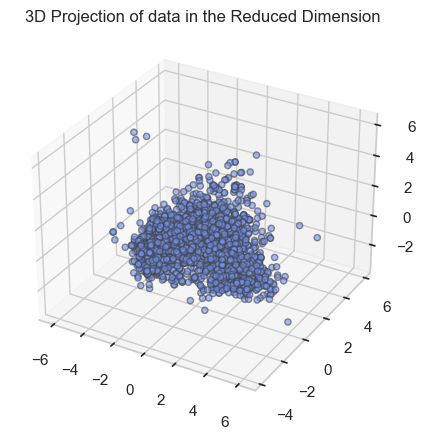

In [71]:
## Plotting the data in reduced dimenion ##

# Extracting components for 3D projection
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

# Creating a 3D scatter plot
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection="3d")
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
ax.scatter(x, y, z, c="#6F91F3", marker="o", edgecolor="#454545", alpha=0.6)
ax.set_title("3D Projection of data in the Reduced Dimension")

ax.grid(linewidth=1.8)

plt.show()

### Clustering
###### Clustering is a crucial exploratory data analysis technique used to identify inherent patterns and groupings within a dataset. In this case, Agglomerative Clustering, a hierarchical clustering method, is used.

Steps Involved in the Clustering Process:
- **Elbow Method to Determine the Number of Clusters**:
The Elbow Method is used to identify the optimal number of clusters. This involves running the clustering algorithm with varying numbers of clusters and plotting the resulting cost or inertia. The "elbow" point in the plot signifies the point at which adding more clusters does not significantly improve the model's performance.

- **Clustering via Agglomerative Clustering**:
Agglomerative Clustering involves iteratively merging data points or clusters until the desired number of clusters is achieved. The linkage criterion, such as Ward or average linkage, determines the merging strategy.

- **Examining the Clusters Formed via Scatter Plot**:
The clustering results are visualized using a scatter plot. Each data point is colored or marked according to its assigned cluster. This visualization helps in understanding the separation and cohesion among clusters.

- Importance of Clustering:
Clustering is employed to uncover hidden patterns, group similar data points, and derive meaningful insights from complex datasets. In this specific context, clustering helps in identifying distinct segments within the customer base, allowing businesses to tailor their strategies for different customer groups. By understanding the inherent structure in the data, organizations can personalize marketing approaches, enhance customer experiences, and optimize resource allocation. Agglomerative Clustering, in particular, provides a hierarchical view of clusters, enabling a more nuanced understanding of the relationships between data points.

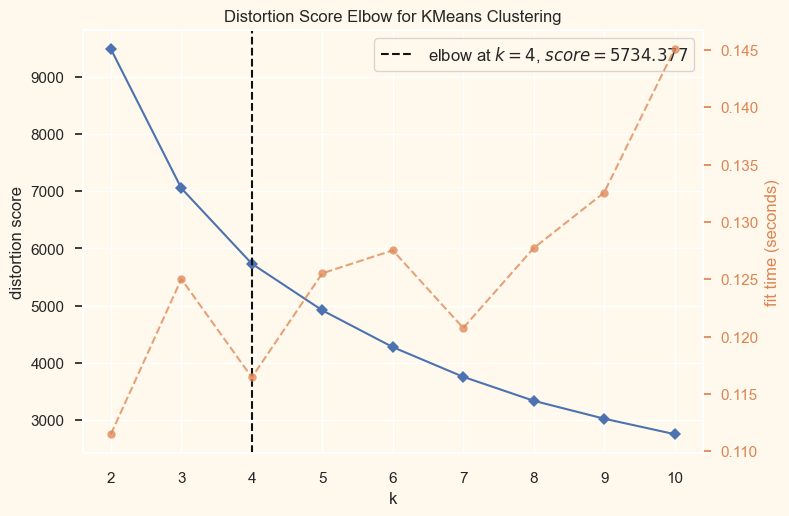

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
# Using elbow method to determine the number of clusters to be formed

# Creating an instance of the KElbowVisualizer with KMeans clustering and a range of potential cluster numbers (k=10)
Elbow_M = KElbowVisualizer(KMeans(), k=10)

# Fitting the visualizer to the PCA-transformed dataset
Elbow_M.fit(PCA_ds)

Elbow_M.show()


The above figure indicates that 4 will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [73]:
# Initiating the Agglomerative Clustering model with 5 clusters
AC = AgglomerativeClustering(n_clusters=4)

# Fit the Agglomerative Clustering model to the PCA-transformed dataset and predict clusters
fit_AC = AC.fit_predict(PCA_ds)

# Creating a new column "Clusters" in the PCA dataset to store cluster assignments
PCA_ds["Clusters"] = fit_AC

# Adding the "Clusters" feature to the original dataframe for further analysis
cust_data_copy["Clusters"] = fit_AC


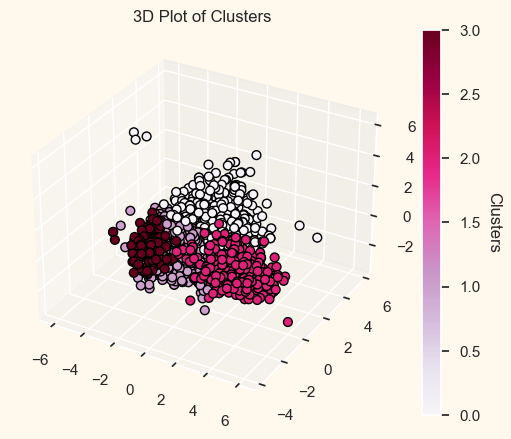

In [74]:
# Plotting the clusters in a 3D space

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d', label="bla")

# Scatter plot with points colored by cluster assignments
scatter = ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap='PuRd', edgecolor="black",alpha=1)

ax.set_title("3D Plot of Clusters")

# Adding color bar for cluster representation
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Clusters', rotation=270, labelpad=15)

plt.show()


#### Evaluating Unsupervised Clustering Models

###### Given the absence of labeled features in this unsupervised clustering, traditional model evaluation metrics are not applicable. Instead, the focus of this section is to delve into the inherent patterns within the formed clusters and gain insights through exploratory data analysis.

###### As a starting point, let's explore the distribution of data across the different clusters.

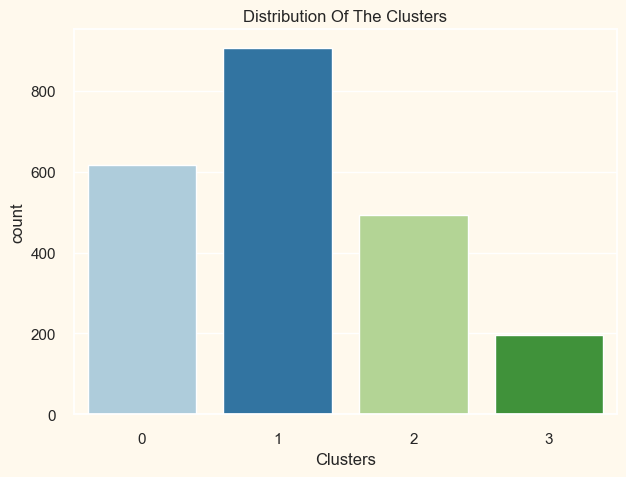

In [75]:
# Distribution of Data Across Clusters

pl_clusters = plt.figure(figsize=(7, 5))
pl_clusters = sns.countplot(x=cust_data_copy["Clusters"], palette="Paired")
pl_clusters.set_title("Distribution Of The Clusters")
plt.show()

The above plot visualizes the number of data points assigned to each cluster after performing Agglomerative Clustering on the dataset. The x-axis represents the clusters, and the y-axis shows the corresponding count of data points within each cluster.

Key insights and analyses from the plot:

- Cluster 1 is the largest cluster with more than 800 data points.
- Cluster 0 and 2 can be considered as a mid size cluster and cluster 3 is a smaller cluster.
- The varying sizes across clusters suggest that the dataset is heterogeneous, with different groups exhibiting diverse characteristics.
- The clustering algorithm has identified and grouped together data points that share similarities, leading to the formation of clusters of different sizes.

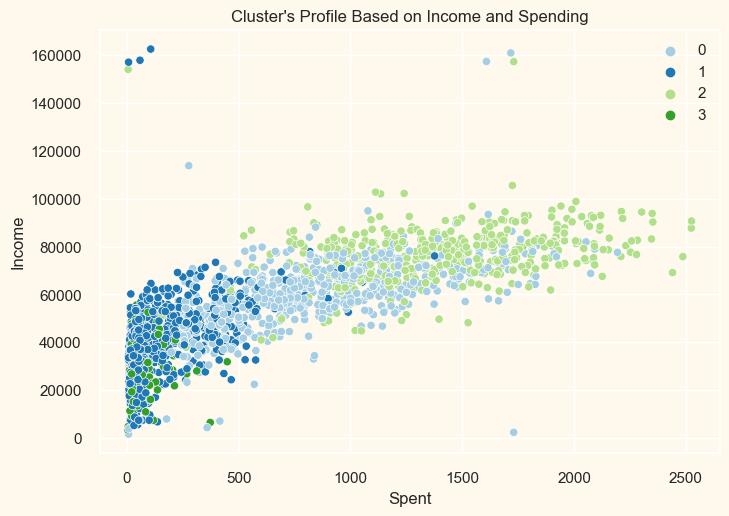

In [76]:
# Scatter plot to visualize the clusters based on the 'Income' and 'Spending' features
pl_clusters = sns.scatterplot(data=cust_data_copy, x=cust_data_copy["Spent"], y=cust_data_copy["Income"], hue=cust_data_copy["Clusters"], palette="Paired")

# Setting plot title
pl_clusters.set_title("Cluster's Profile Based on Income and Spending")

plt.legend()

plt.show()

Key insights from the plot:
- Cluster 0: high spending & average income
- Cluster 1: low spending & high income
- Cluster 2: high spending & high income
- Cluster 3: low spending & low income

###### Next, I will analyze the distribution of total spending across different clusters. 

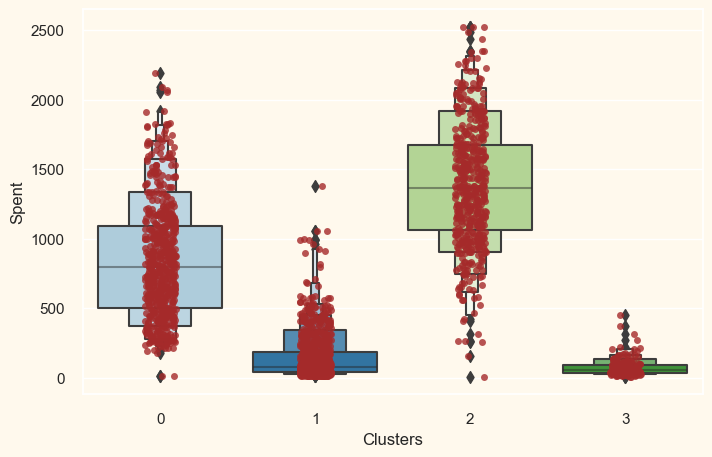

In [77]:
plt.figure(figsize=(8,5))

pl_clusters = sns.stripplot(x=cust_data_copy["Clusters"], y=cust_data_copy["Spent"], color= "brown", alpha=0.8, jitter=True )

pl_clusters = sns.boxenplot(x=cust_data_copy["Clusters"], y=cust_data_copy["Spent"], palette="Paired")

plt.show()

From the above plot, it can be clearly seen that cluster 0 and 2 are our biggest set of customers. 

###### Next, let's analyze how our campaigns did in the past.

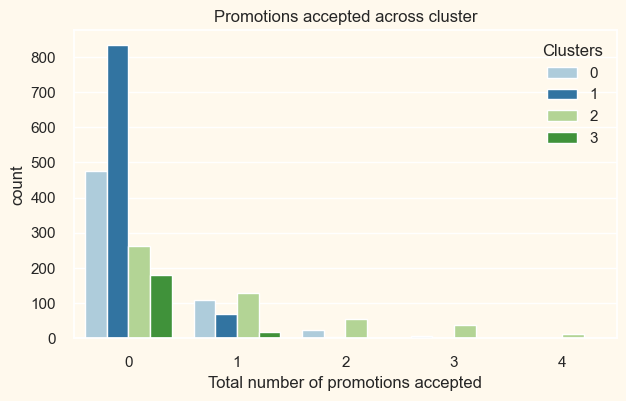

In [78]:
# Creating a new column to represent the total number of accepted promotions

plt.figure(figsize=(7,4))

# visualize the distribution of total accepted promotions across clusters
pl_clusters = sns.countplot(x=cust_data_copy["Total_Promos"], hue=cust_data_copy["Clusters"], palette="Paired")

pl_clusters.set_title("Promotions accepted across cluster")
pl_clusters.set_xlabel("Total number of promotions accepted")

plt.show()


Here's an interpretation of the above plot:

- The majority of clusters show a lower count of accepted promotions.
- More than 50% of the people from all clustes have not accepted any promotions.
- For clusters with low acceptance, marketing strategies may need adjustment to better target and engage those customer segments.
- For clusters with higher acceptance, optimizing and expanding promotional campaigns to those segments could yield favorable results.

###### Next, I will analyze the number of deals purchased across clusters

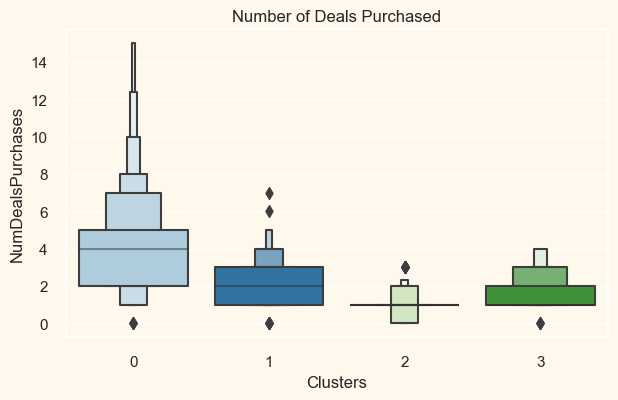

In [79]:
#Plotting the number of deals purchased across clusters
plt.figure(figsize=(7,4))

pl_clusters=sns.boxenplot(y=cust_data_copy["NumDealsPurchases"],x=cust_data_copy["Clusters"], palette="Paired")
pl_clusters.set_title("Number of Deals Purchased")

plt.show()

Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and 1. However for cluster 2 and 3, the plot highlights the need for differentiated business tactics to address these clusters because currently they are less active in participating in promotional deals.

###### Lastly, I will analyze the different sources of puchases.

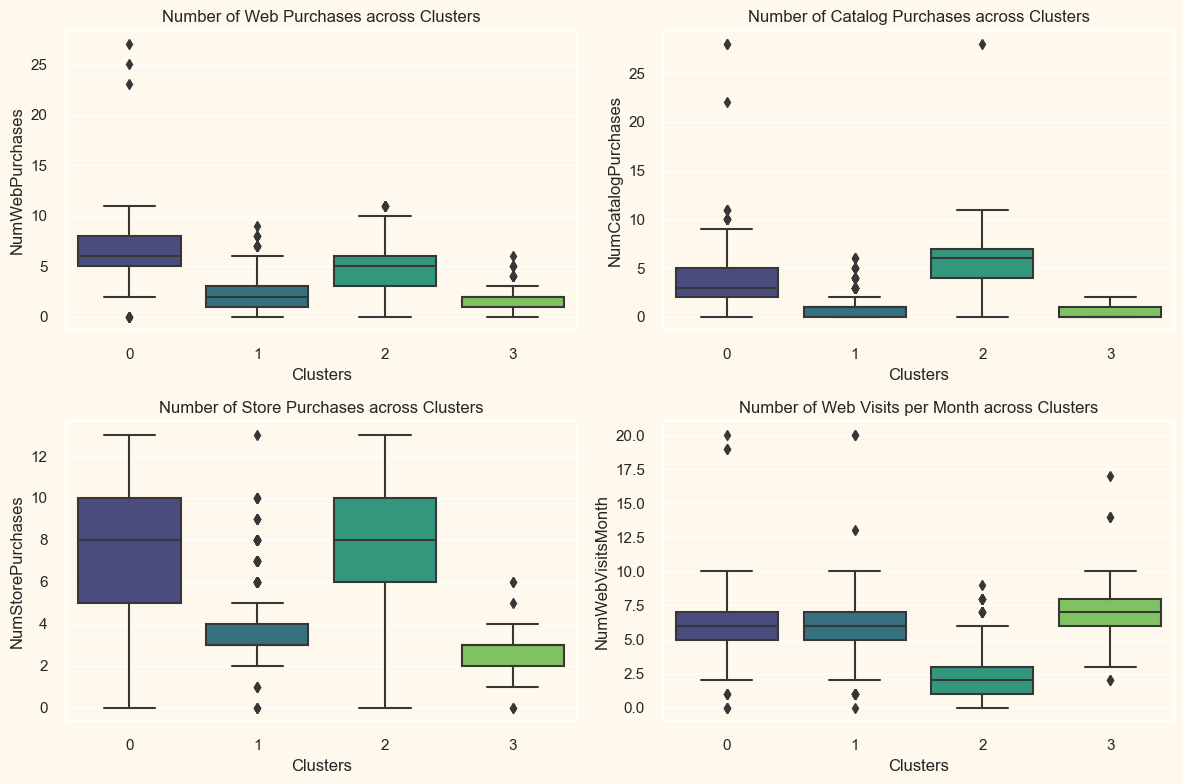

In [80]:
# Creating a copy of the DataFrame to avoid SettingWithCopyWarning
# Initiating necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the specified columns across clusters using box plots
plt.figure(figsize=(12, 8))

# NumWebPurchases
plt.subplot(2, 2, 1)
sns.boxplot(x=cust_data_copy["Clusters"], y=cust_data_copy["NumWebPurchases"], palette="viridis")
plt.title("Number of Web Purchases across Clusters")

# NumCatalogPurchases
plt.subplot(2, 2, 2)
sns.boxplot(x=cust_data_copy["Clusters"], y=cust_data_copy["NumCatalogPurchases"], palette="viridis")
plt.title("Number of Catalog Purchases across Clusters")

# NumStorePurchases
plt.subplot(2, 2, 3)
sns.boxplot(x=cust_data_copy["Clusters"], y=cust_data_copy["NumStorePurchases"], palette="viridis")
plt.title("Number of Store Purchases across Clusters")

# NumWebVisitsMonth
plt.subplot(2, 2, 4)
sns.boxplot(x=cust_data_copy["Clusters"], y=cust_data_copy["NumWebVisitsMonth"], palette="viridis")
plt.title("Number of Web Visits per Month across Clusters")

plt.tight_layout()
plt.show()
